# Qld fastai class: Lesson 7 - Tabular 

<br/><br/>
## __Motivation__:
Critical analysis is important in many roles but it is a particularly vital part of working with data. Many data science tools, and AI/ML in general, have increasingly been democratised in recent years. It seems likely that accessibility to AI/ML will continue to grow as integrating SOTA models becomes as simple as calling an API. This is great news - but what does it mean for current AI/ML practitioners? Well, you could argue that critical analysis skills will remain as a key differentiator, and may well become more important than ever.

A real data-driven approach means overcoming biases and logical fallacies we may fall into when dealing with data and results. We need to maintain a pragmatic level of _trust issues_ when dealing with data, regardless of whether it be from a widely used source, a top site, or an interpretation from an authoritative figure. We also need to be open and welcoming of this critique. This task will give us a nice opportunity to review these skills, while acting as an introduction to tabular methods.
<br/><br/>
## __Instructions__:
This lesson recap shows two analyses that are __deliberately flawed or suboptimal__ in certain areas. Your task is to review these analyses and identify the key areas that you think could have been improved, are limiting in some aspect, or may be outright incorrect. Please note:
- Some of the improvements may require a little digging into the datasets, but don't overthink it, they should be fairly evident and are more focused on thinking about the data itself.
- __Please do not share or discuss the 'answers' to this task before the lesson. Part of the benefit to an activity like this is giving people the chance to think it through themselves.__

<br/><br/>
```
Author: Macabe Daley - 12 July 2021
```

# Setup:

Download the following - 
- UCI: Absenteeism at Work csv:
    - https://archive-beta.ics.uci.edu/ml/datasets/445
    - Place csv file in working directory and name 'Absenteeism_at_work.csv', if not already.
<br/><br/>
- Kaggle: Rain in Australia weatherAUS.csv:
        kaggle datasets download -d jsphyg/weather-dataset-rattle-package
     - Place csv file in working directory and name 'weatherAUS.csv', if not already.
     - https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

_If you have any trouble with downloading files or loading packages don't stress - all the material below should be enough to begin asking a few questions, though it will be easier to run things yourself._

In [ ]:
from fastbook import *
from kaggle import api
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_digits
palette = sns.color_palette("bright", 10)

import pandas as pd
import os

In [ ]:
%config IPCompleter.use_jedi = False

# PART 1: Employee Absences
It's peak COVID and we're an ML consultant. To many people that means staying at home. For our latest client however, things have never been more busy. They are a large courier company in Brazil, so the number of orders they are receiving has skyrocketed. 

As a consequence of the Client's booming business, their current staff are working double-time and they are also looking to hire many new people. The biggest hit to their operating efficiency is employees taking planned or unplanned absences, because it wreaks havoc on the carefully organised delivery schedules. The COO and HR Manager have had a new idea that may help solve this - what if they could predict the length of these absences in advance? 

The courier company has approached your employer and requested that you fulfil the following two tasks:
1. Build an ML model that can predict an employees absence in hours.
2. Provide them with a report of actionable factors that may be associated with absenteeism, which the company might then use for hiring purposes.

The HR manager has kindly sorted you out with what you need and given you 740 complete records from their entire employee database.

In [ ]:
df = pd.read_csv('Absenteeism_at_work.csv', sep=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,100,170,35,0


In [ ]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

Let's specify a few of these columns as category columns

In [ ]:
category_cols = ['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons']

In [ ]:
for col in category_cols:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ID                               740 non-null    category
 1   Reason for absence               740 non-null    category
 2   Month of absence                 740 non-null    category
 3   Day of the week                  740 non-null    category
 4   Seasons                          740 non-null    category
 5   Transportation expense           740 non-null    int64   
 6   Distance from Residence to Work  740 non-null    int64   
 7   Service time                     740 non-null    int64   
 8   Age                              740 non-null    int64   
 9   Work load Average/day            740 non-null    float64 
 10  Hit target                       740 non-null    int64   
 11  Disciplinary failure             740 non-null    int64   
 12  Educatio

In [ ]:
df.describe(include='category')

,ID,Reason for absence,Month of absence,Day of the week,Seasons
count,740,740,740,740,740
unique,36,28,13,5,4
top,3,23,3,2,4
freq,113,149,87,161,195


In [ ]:
procs = [Categorify, FillMissing]

In [ ]:
uid_l = df.ID.unique().to_list()
uid_l.sort()

In [ ]:
one_third_dataset = len(uid_l) // 3 * 2
cond_t = df['ID'].apply(lambda x: x in uid_l[:one_third_dataset])
cond_v = df['ID'].apply(lambda x: x in uid_l[one_third_dataset:])
train_idx = np.where(cond_t)[0]
valid_idx = np.where(cond_v)[0]

splits = (list(train_idx),list(valid_idx))

In [ ]:
dep_var = 'Absenteeism time in hours'

In [ ]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
cont

['Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index']

In [ ]:
cat

['ID', 'Reason for absence', 'Month of absence', 'Day of the week', 'Seasons']

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train),len(to.valid)

(508, 232)

In [ ]:
to.show(3)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554001,97,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239.554001,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554001,97,0,1,2,1,1,0,68,168,24,4


In [ ]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=8)
m.fit(xs, y);

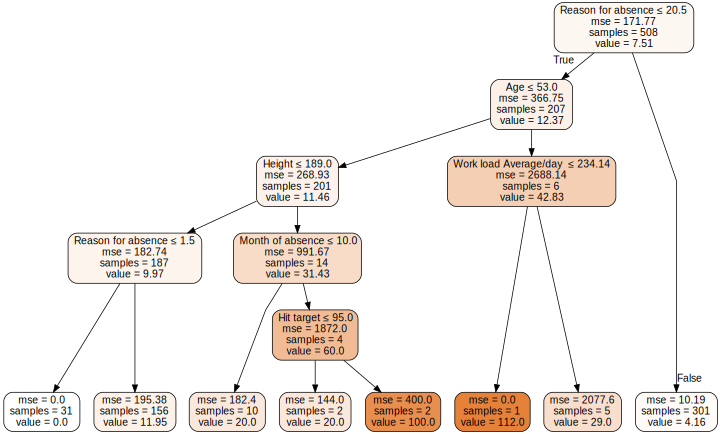

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

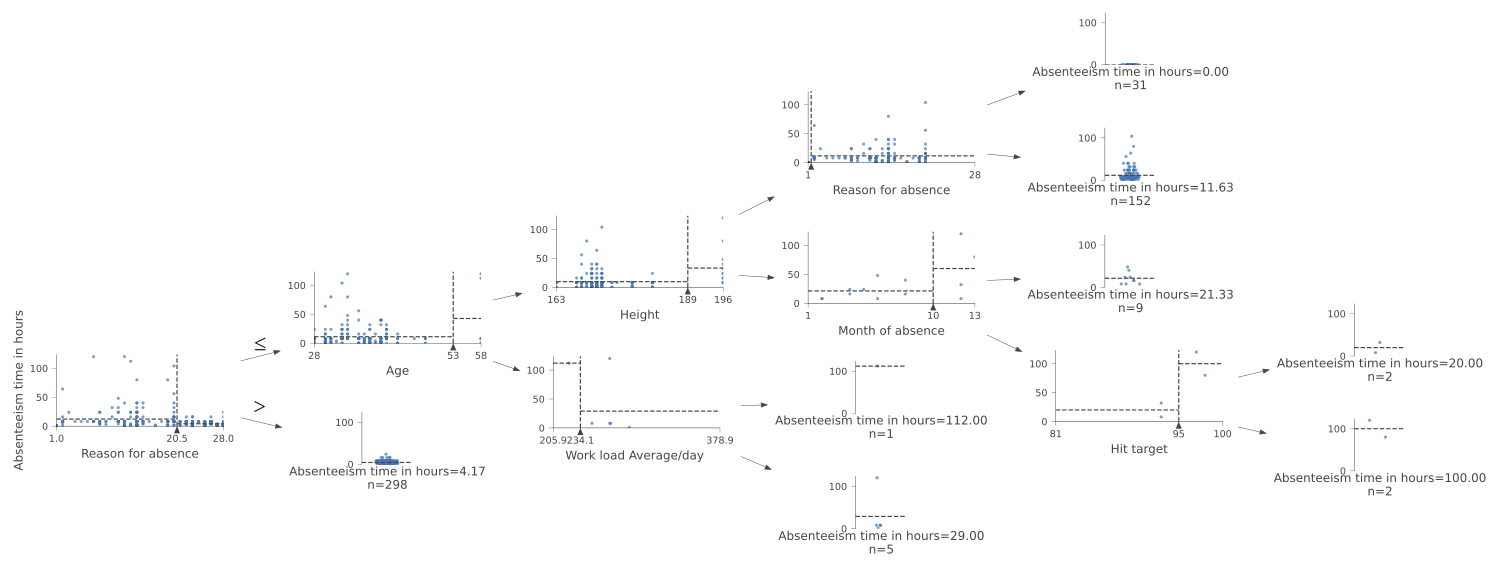

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [ ]:
m_rmse(m, xs, y)

9.603142

In [ ]:
m_rmse(m, valid_xs, valid_y)

12.985394

In [ ]:
m.get_n_leaves(), len(xs)

(8, 508)

_Let's try more samples on the leaves_

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(11.010997, 13.155667)

In [ ]:
m.get_n_leaves(), len(xs)

(15, 508)

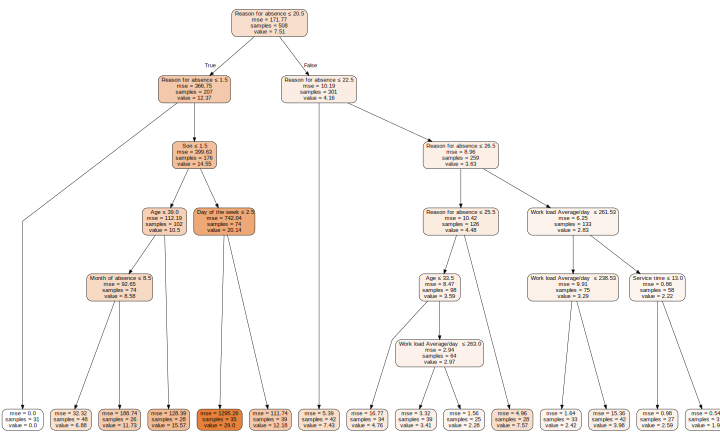

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

_Let's try a random forest now_

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=508,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(9.723108, 13.539871)

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
r_mse(preds.mean(0), valid_y)

13.539871

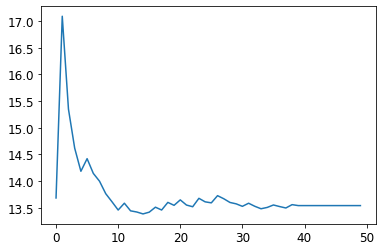

In [ ]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(50)]);

In [ ]:
r_mse(m.oob_prediction_, y)

12.157398

In [ ]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [ ]:
preds.shape

(40, 232)

In [ ]:
preds_std = preds.std(0)

In [ ]:
preds_std[:5]

array([25.83271214, 10.70739064,  9.11629005,  1.99546678, 14.23811724])

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
1,Reason for absence,0.299480
8,Age,0.100354
9,Work load Average/day,0.090599
5,Transportation expense,0.073063
3,Day of the week,0.067328
2,Month of absence,0.057405
6,Distance from Residence to Work,0.056248
18,Height,0.050032
10,Hit target,0.036316
13,Son,0.031552


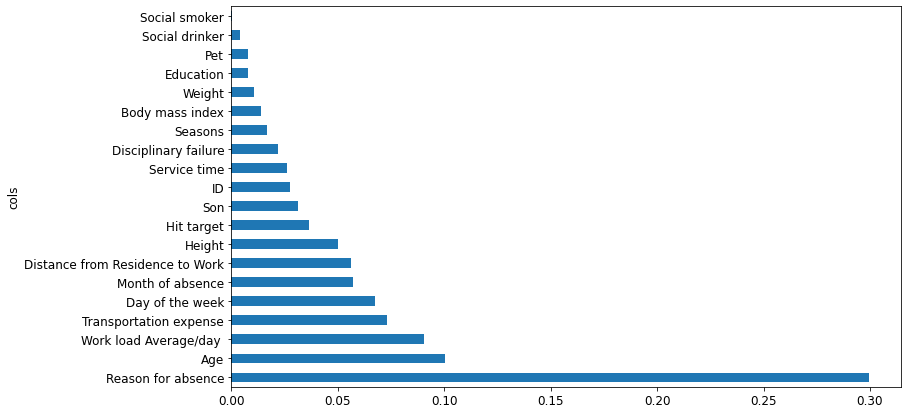

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

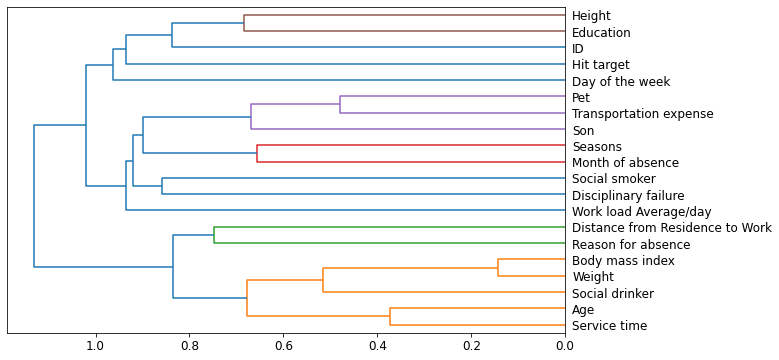

In [ ]:
cluster_columns(xs)

### Conclusion:

_We have a plot now that shows there is a single factor that is a very large contributor to our dependant variable of interest. We can tell the client that we have identified the largest contributor to the outcome._

_What's more, we seem to have identified variables that play an intriguing role in absenteeism that our client may not have initially expected - in particular, Height. Could we uncover some biological explanation behind this? Now that we think about it, the dataset did not include an individual's Gender. Men, who are taller on average than women, may be more likely to take time off work. We can't know this for sure of course without having access to this variable, but it is worth reporting back to the Client so that they can begin collecting the data on this._

_Then, just as we're about to send our final report to the Client, our colleague messages us. They claim they reran our analysis but the results did not show these factors to be as important as we did. In fact, they have reached quite a different conclusion, and believe we may have done something wrong. We think back to our analysis and wonder what we may have done differently to them and what we missed._
<br/><br/>


### Critique:

- What do we think of this analysis?

- What do we tell our colleague, our boss, and our client?

# PART 2: Weather Events

We work for a startup that wants to _revolutionise_ weather prediction. 

The initial plan is to use __Machine Learning__ and __Big Data__ to predict whether or not, on any given day, it will rain tomorrow (t+1) in a number of cities and towns around Australia. 

To enable this, our smooth-talking CEO has somehow managed to convince the Bureau Of Metereology into sharing with our company a specially curated dataset of nearly 50 locations over a period of just over 10 years. 

Honestly, we think we'll probably be able to hack it with a random forest, but of course our CEO has given us the sage advice that we could 'just use an AI', so we plan on trying out a neural net too.

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.Location.nunique()

49

In [ ]:
df.Location.value_counts()

Canberra            3436
Sydney              3344
Hobart              3193
Perth               3193
Darwin              3193
Melbourne           3193
Adelaide            3193
Brisbane            3193
Ballarat            3040
AliceSprings        3040
MountGinini         3040
Launceston          3040
Bendigo             3040
Albury              3040
GoldCoast           3040
Townsville          3040
Wollongong          3040
Albany              3040
MountGambier        3040
Cairns              3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
Cobar               3009
SydneyAirport       3009
PerthAirport        3009
CoffsHarbour        3009
Watsonia            3009
Portland            3009
Moree               3009
Woomera             3009
Witchcliffe         3009
PearceRAAF          3009
Dartmoor            3009
Williamtown         3009
MelbourneAirport    3009
Richmond            3009
Sale                3009
Mildura             3009
WaggaWagga          3009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
col_cats = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [ ]:
for col in col_cats:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Date           145460 non-null  object  
 1   Location       145460 non-null  category
 2   MinTemp        143975 non-null  float64 
 3   MaxTemp        144199 non-null  float64 
 4   Rainfall       142199 non-null  float64 
 5   Evaporation    82670 non-null   float64 
 6   Sunshine       75625 non-null   float64 
 7   WindGustDir    135134 non-null  category
 8   WindGustSpeed  135197 non-null  float64 
 9   WindDir9am     134894 non-null  category
 10  WindDir3pm     141232 non-null  category
 11  WindSpeed9am   143693 non-null  float64 
 12  WindSpeed3pm   142398 non-null  float64 
 13  Humidity9am    142806 non-null  float64 
 14  Humidity3pm    140953 non-null  float64 
 15  Pressure9am    130395 non-null  float64 
 16  Pressure3pm    130432 non-null  float64 
 17  Cloud9am  

In [ ]:
dep_var = 'RainTomorrow'

In [ ]:
df = add_datepart(df, 'Date')

In [ ]:
df.groupby('Year').count()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
2008,2270,2259,2262,2245,1931,1947,1817,1818,2178,2247,2240,2251,2245,2247,2175,2176,1891,1881,2251,2254,2245,2246,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270,2270
2009,16789,16582,16631,16594,11075,10643,15071,15073,15406,16221,16379,16355,16511,16486,15044,15043,11222,10987,16556,16524,16594,16595,16789,16789,16789,16789,16789,16789,16789,16789,16789,16789,16789,16789
2010,16782,16581,16638,16422,10857,10562,15236,15239,15271,16239,16363,16409,16487,16536,15158,15164,11250,11099,16515,16550,16422,16419,16782,16782,16782,16782,16782,16782,16782,16782,16782,16782,16782,16782
2011,15407,15337,15361,15125,9610,9354,14379,14381,14371,15136,15315,15291,15206,15250,13848,13865,9567,9329,15231,15271,15125,15126,15407,15407,15407,15407,15407,15407,15407,15407,15407,15407,15407,15407
2012,15409,15350,15362,15043,9353,8870,14532,14537,14271,15161,15322,15289,14943,14989,14030,14018,9540,9270,15230,15253,15043,15044,15409,15409,15409,15409,15409,15409,15409,15409,15409,15409,15409,15409
2013,16415,16345,16362,16099,9987,8845,15563,15590,15305,16180,16333,16347,16237,16226,15031,15043,9646,9597,16294,16334,16099,16097,16415,16415,16415,16415,16415,16415,16415,16415,16415,16415,16415,16415
2014,17885,17767,17807,17398,9658,8728,16694,16696,16410,17406,17551,17553,17738,17719,15871,15882,10736,10664,17775,17793,17398,17400,17885,17885,17885,17885,17885,17885,17885,17885,17885,17885,17885,17885
2015,17885,17469,17474,17232,9194,8444,16860,16881,16703,17320,17755,17471,17291,16841,15489,15493,10780,10357,17482,17032,17232,17231,17885,17885,17885,17885,17885,17885,17885,17885,17885,17885,17885,17885


In [ ]:
procs = [Categorify, FillMissing]

In [ ]:
cond = df.Year < 2016
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

In [ ]:
df.iloc[np.where( cond)[0]]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,49,1,0,336,False,True,False,False,False,False,1.228090e+09
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,49,2,1,337,False,False,False,False,False,False,1.228176e+09
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,49,3,2,338,False,False,False,False,False,False,1.228262e+09
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,49,4,3,339,False,False,False,False,False,False,1.228349e+09
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,49,5,4,340,False,False,False,False,False,False,1.228435e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,E,35.0,20.0,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No,2015,12,52,27,6,361,False,False,False,False,False,False,1.451174e+09
144914,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,ESE,30.0,31.0,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No,2015,12,53,28,0,362,False,False,False,False,False,False,1.451261e+09
144915,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,SE,33.0,22.0,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No,2015,12,53,29,1,363,False,False,False,False,False,False,1.451347e+09
144916,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,SSE,20.0,17.0,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No,2015,12,53,30,2,364,False,False,False,False,False,False,1.451434e+09


In [ ]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [ ]:
splits = (list(train_idx), list(valid_idx))

In [ ]:
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [ ]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [ ]:
len(to.train),len(to.valid)

(118903, 26557)

In [ ]:
to.show(3)

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,MinTemp_na,MaxTemp_na,Rainfall_na,Evaporation_na,Sunshine_na,WindGustSpeed_na,WindSpeed9am_na,WindSpeed3pm_na,Humidity9am_na,Humidity3pm_na,Pressure9am_na,Pressure3pm_na,Cloud9am_na,Cloud3pm_na,Temp9am_na,Temp3pm_na,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed,RainTomorrow
0,Albury,W,W,WNW,No,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,13.4,22.900000,0.6,4.6,8.4,44.0,20.0,24.0,71.0,22.0,1007.700012,1007.099976,8.0,5.0,16.900000,21.799999,2008,12,49,1,0,336,1.228090e+09,No
1,Albury,WNW,NNW,WSW,No,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,7.4,25.100000,0.0,4.6,8.4,44.0,4.0,22.0,44.0,25.0,1010.599976,1007.799988,5.0,5.0,17.200001,24.299999,2008,12,49,2,1,337,1.228176e+09,No
2,Albury,WSW,W,WSW,No,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,12.9,25.700001,0.0,4.6,8.4,46.0,19.0,26.0,38.0,30.0,1007.599976,1008.700012,5.0,2.0,21.000000,23.200001,2008,12,49,3,2,338,1.228262e+09,No


In [ ]:
to.items.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,MinTemp_na,MaxTemp_na,Rainfall_na,Evaporation_na,Sunshine_na,WindGustSpeed_na,WindSpeed9am_na,WindSpeed3pm_na,Humidity9am_na,Humidity3pm_na,Pressure9am_na,Pressure3pm_na,Cloud9am_na,Cloud3pm_na,Temp9am_na,Temp3pm_na
0,3,13.4,22.900000,0.6,4.6,8.4,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.700012,1007.099976,8.0,5.0,16.900000,21.799999,1,0,2008,12,49,1,0,336,1,2,1,1,1,1,1.228090e+09,1,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1
1,3,7.4,25.100000,0.0,4.6,8.4,15,44.0,7,16,4.0,22.0,44.0,25.0,1010.599976,1007.799988,5.0,5.0,17.200001,24.299999,1,0,2008,12,49,2,1,337,1,1,1,1,1,1,1.228176e+09,1,1,1,2,2,1,1,1,1,1,1,1,2,2,1,1
2,3,12.9,25.700001,0.0,4.6,8.4,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.599976,1008.700012,5.0,2.0,21.000000,23.200001,1,0,2008,12,49,3,2,338,1,1,1,1,1,1,1.228262e+09,1,1,1,2,2,1,1,1,1,1,1,1,2,1,1,1


In [ ]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [ ]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

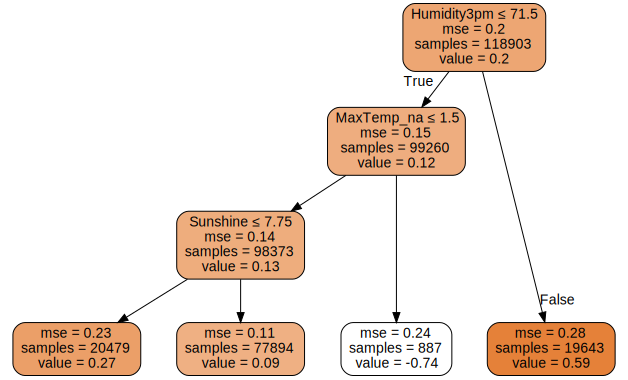

In [ ]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

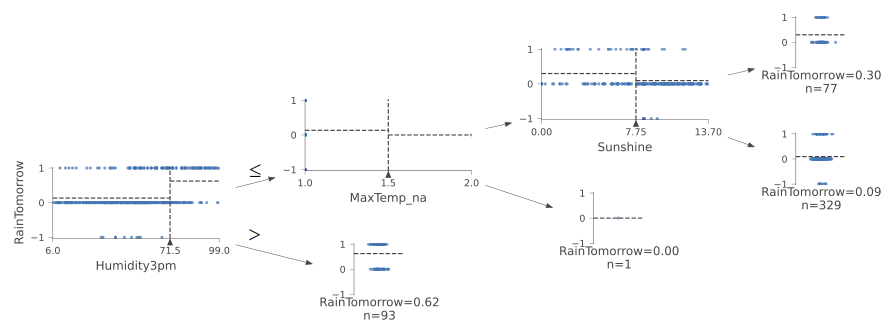

In [ ]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [ ]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [ ]:
m_rmse(m, xs, y)

0.402536

In [ ]:
m_rmse(m, valid_xs, valid_y)

0.409689

In [ ]:
m.get_n_leaves(), len(xs)

(4, 118903)

In [ ]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.323544, 0.397737)

_Trying a random forest now_

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=118_903,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [ ]:
m = rf(xs, y);

In [ ]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.238366, 0.366408)

In [ ]:
r_mse(m.oob_prediction_, y)

0.349925

In [ ]:
preds_std = preds.std(0)

In [ ]:
preds_std[:5]

array([25.83271214, 10.70739064,  9.11629005,  1.99546678, 14.23811724])

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [ ]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
36,Humidity3pm,0.235282
29,Rainfall,0.062108
38,Pressure3pm,0.052671
31,Sunshine,0.047945
32,WindGustSpeed,0.046624
4,RainToday,0.036291
37,Pressure9am,0.032943
49,Elapsed,0.029176
35,Humidity9am,0.028670
27,MinTemp,0.026915


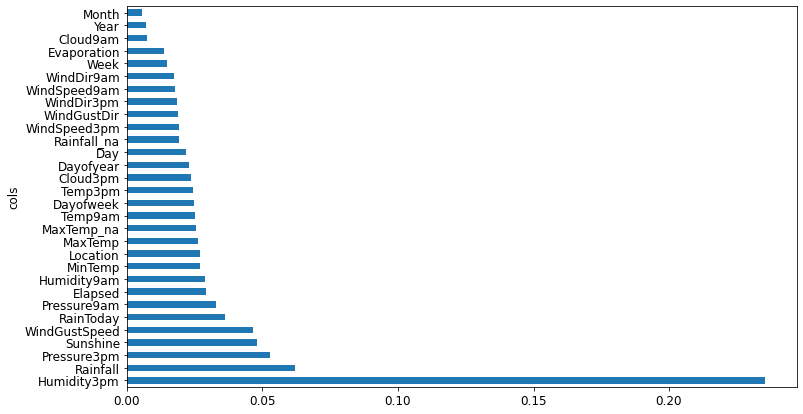

In [ ]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [ ]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [ ]:
get_oob(xs)

0.3875640249083705

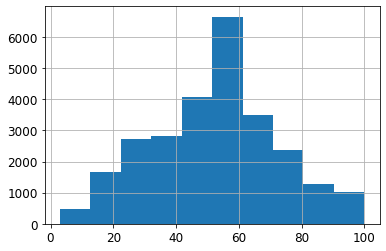

In [ ]:
ax = valid_xs['Humidity3pm'].hist()


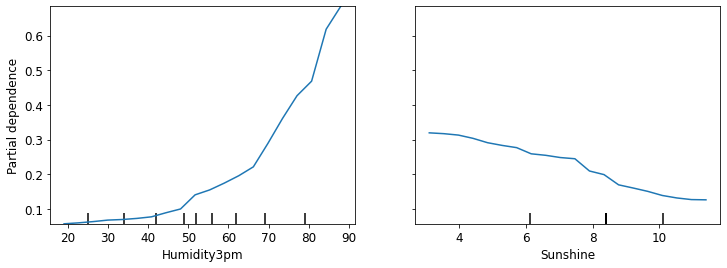

In [ ]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs, ['Humidity3pm', 'Sunshine'],
                        grid_resolution=20, ax=ax);

In [ ]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [ ]:
m = rf(xs, y)

In [ ]:
row = valid_xs.iloc[:5]

In [ ]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [ ]:
prediction[0], bias[0], contributions[0].sum()

(array([0.18255172]), 0.19576377383245167, -0.013212054718232544)

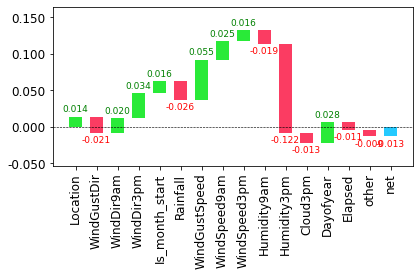

In [ ]:
waterfall(valid_xs.columns, contributions[0], threshold=0.08, 
          rotation_value=90,formatting='{:,.3f}');

_Trying a neural net now_

In [ ]:
df_nn_final = df.copy()

In [ ]:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [ ]:
df_nn_final[cat_nn].nunique()

Location             49
WindGustDir          16
WindDir9am           16
WindDir3pm           16
RainToday             2
Year                 11
Month                12
Week                 53
Day                  31
Dayofweek             7
Dayofyear           366
Is_month_end          2
Is_month_start        2
Is_quarter_end        2
Is_quarter_start      2
Is_year_end           2
Is_year_start         2
dtype: int64

In [ ]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [ ]:
for col in to_nn.items:
    to_nn.items[col] = to_nn.items[col].astype(np.float32)

In [ ]:
dls = to_nn.dataloaders(1024)

In [ ]:
y = to_nn.train.y

In [ ]:
learn = tabular_learner(dls, y_range=(-0.5,1.5), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(lr_min=0.03019951581954956, lr_steep=9.120108734350652e-05)

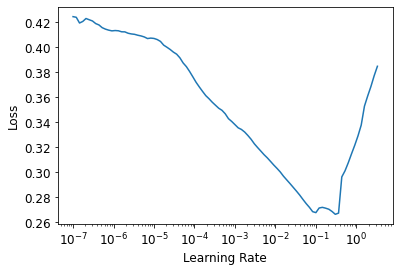

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(5, 6e-3)

epoch,train_loss,valid_loss,time
0,0.156362,0.146314,00:05
1,0.124865,0.138055,00:05
2,0.111864,0.137316,00:05
3,0.102091,0.141000,00:05
4,0.091814,0.146482,00:05


In [ ]:
preds,targs = learn.get_preds()

In [ ]:
preds

tensor([[ 0.2992],
        [-0.0261],
        [ 0.1363],
        ...,
        [ 0.0323],
        [ 0.0351],
        [-0.4965]])

In [ ]:
targs

tensor([[ 0.],
        [ 1.],
        [ 1.],
        ...,
        [ 0.],
        [ 0.],
        [-1.]])

In [ ]:
r_mse(preds,targs)

0.382729

### Conclusion:

_We've learnt that the Humidity at 3pm on any given day seems to be the largest contributing factor to whether it will rain the following day. Intriguingly, this is ranked as an even larger contributing factor than whether it has rained on the current day._ 

_Our overall performance is a bit difficult to interpret, but what matters is that we can see the random forest had a lower RMSE than the neural net, so we know that it performed better. This was somewhat surprising however because the neural net seemed to be improving during training._

_We show our CEO the model and give a presentation on how it works. One of the first questions they have however, is whether we were right to include the 'RainToday' variable, because this is so similar to what are trying to predict. We're of the opinion that it was fine to include, because it is different afterall, but we are starting to wonder._

### Critique:

- What do we think of this analysis?

- What do we tell our colleague, our boss, and our client?

# References:
- https://hbr.org/2017/09/only-3-of-companies-data-meets-basic-quality-standards